<a href="https://colab.research.google.com/github/Ria-K912/IIIT-Hyderabad-Tutorial-Assignment-1/blob/main/Copy_of_SRISHTI'23_Tutorial_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SRISHTI'23 - Tutorial 06**
# Linear Classifiers and Perceptron Algorithm
### Lab Coordinator: Shantanu Agrawal

In this lab, we will be studying the use of linear classifiers, followed by using perceptron learning algorithm.

**Linear classifiers** can be understood as form of **classifiers** (which will classify things into two different output categories) and we are doing this by **involving a linear equation**.

## Let's understood how line can classify datapoints using an example:<br>
Given a line as G(X), where X are values of different features given in (d+1)-dimensioanl vector form:<br>
$G(X) = w^TX = 6x_1 + 3x_2 - 12$<br>
(Here, d=2 and w = [6,3,-12], we are assuming the augmented version of w or coefficient vector)

Let's make a toy dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[1,2,1]])

import random
for i in range(10):
  x_1 = random.randint(0,3)
  x_2 = random.randint(0,5)
  X = np.asarray([[x_1, x_2, 1]]) # adding bias term at the end for augmented version of X as well
  points = np.append(points, X, axis=0)

print(points)

[[1 2 1]
 [1 0 1]
 [1 4 1]
 [3 3 1]
 [1 1 1]
 [2 1 1]
 [3 4 1]
 [2 5 1]
 [0 4 1]
 [0 2 1]
 [0 4 1]]


In [2]:
# We have w or coefficients vector as
w = np.asarray([6,3,-12])

In [3]:
# Now let's do the linear classification
# we do it by checking the value of G(X)

def linClassification(w, points):
  for point in points:
    gx = 0
    for i in range(len(w)):
      gx+=w[i]*point[i]
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

def linClassification_VectorialForm(w, points):
  for point in points:
    gx = np.sum(w*point)
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

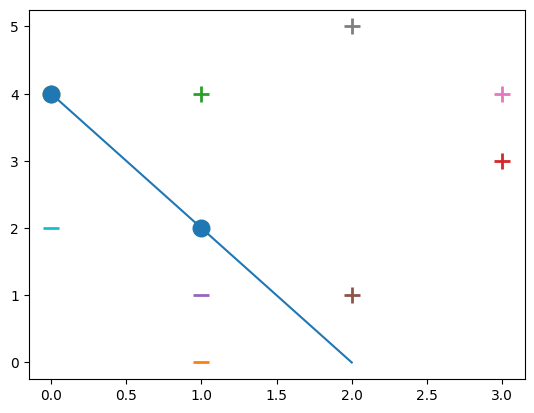

In [4]:
# Lets first plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification(w, points)
plt.show()

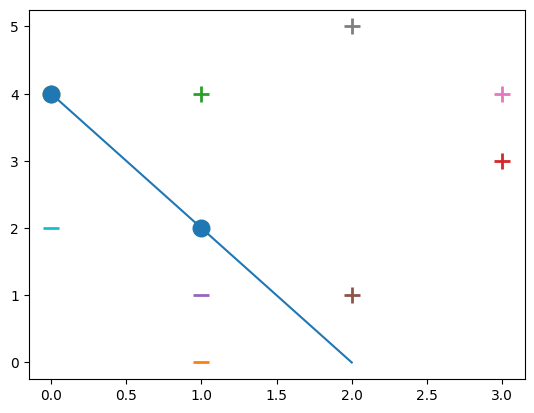

In [5]:
# Now let's check what happens if we do it vector from

# First plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification_VectorialForm(w, points)
plt.show()

So, we can see that how line can classify the data points. And we understand how it is done. But how do we get to know the correct line which would stand as our answer for the dataset.

So, to get the required line, we will try to understand various Linear Classifiers.

### First we have Perceptron Update algorithm to find the required line

We can now code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set.

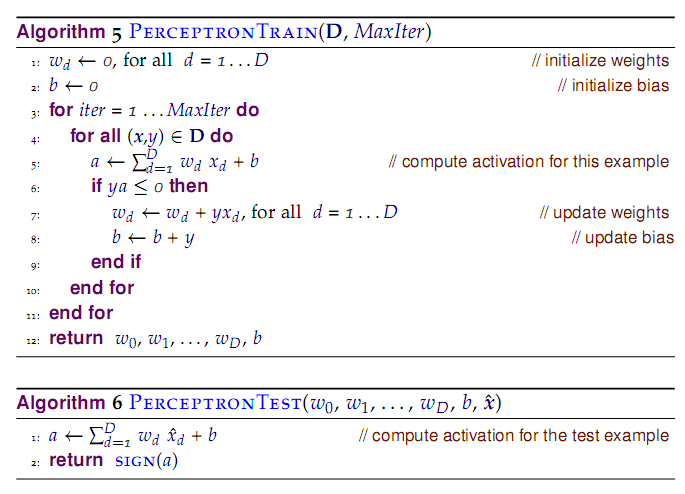

By checking **$y.a <= 0$**, misclassifed data-points have been checked and update is being done accordingly.

For larger data sets it makes sense, to randomly pick a sample during each iteration in the for-loop(s) (i.e, **Batch Perceptron Update**).

The below mentioned algorithm is shown in the above image.

In [6]:
# Creating the labeled dataset for the example simulation of above shown algorithm
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = np.array([-1, -1, 1, 1, 1])


In [7]:
def perceptron_algo(X, Y):
    # random line is being called to start the algorithm
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [8]:
# Let's analyse the algorithm against number of iterations needed
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []
    misclassified_points = []
    avg_error = []

    for t in range(n):
        total_error = 0
        number = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                number += 1
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
        misclassified_points.append(number)
        if number==0:
          avg_error.append(number)
        else:
          avg_error.append((total_error * -1)/number)

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(errors, label ='Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(avg_error, label ='Average Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

Next, we will see the the training error at each epoch.

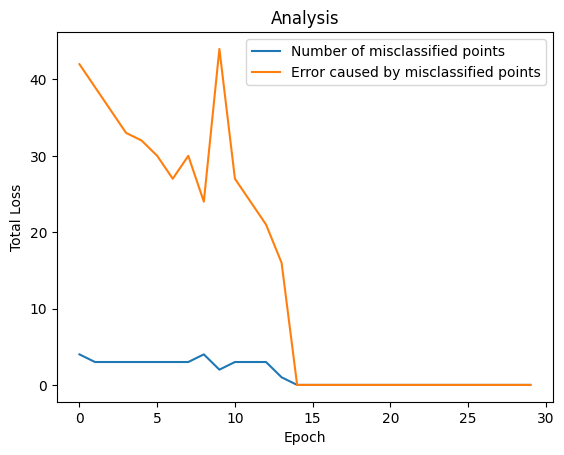

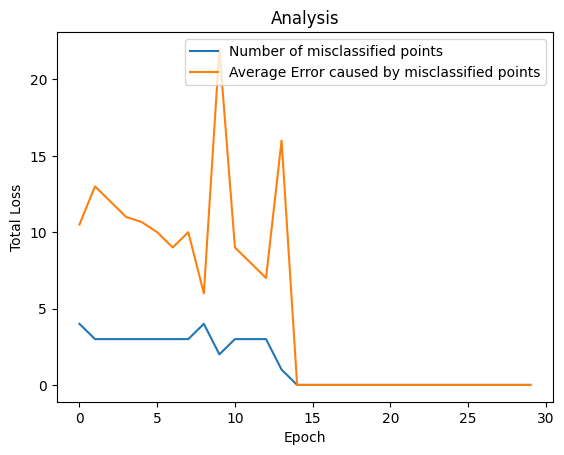

In [9]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

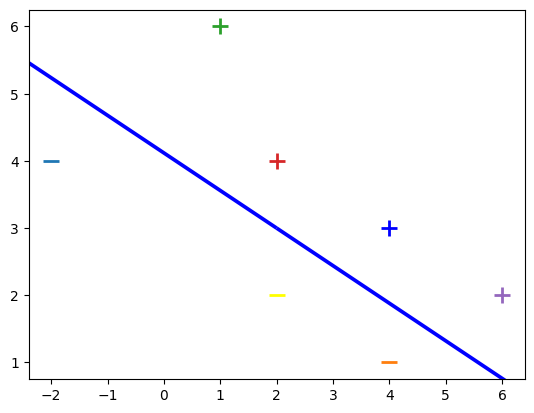

In [10]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   In our case eta or the learning rate is equal to 1. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3.   Also try to understand what is happening analytically, if you are increasing or decreasing the learning rate, how it can be helpful to you?
    - [Understanding Learning Rates and How It Improves Performance in Deep Learning](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10). Try to get the gist of the blog, would be more clearer in the later part of the course.
5.   Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
    - [Solving XOR with a single Perceptron](https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182).
6.   Perceptron algorithm trains the model in the manner such that it **just** answers the question according to the training data but does not give the most optimal answer, in the manner that it does not maximizes the seperability from both the classes and thus have a chance of not doing well in validation or testing data. How will you try to solve this problem? Note your observation.
    - [Perceptron vs SVM: a quick comparison](https://medium.com/@subashkharel/perceptron-vs-svm-a-quick-comparison-6b5d6b5d64f). Try to read more such Medim or TowardsDataScience articles for understanding more about Machine Learning.
7.   Can this method or some extension on this be used for classifying more than two classes at once. Note your observations.

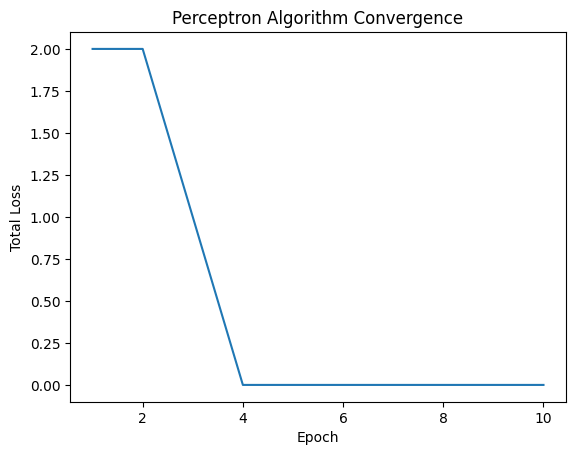

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def perceptron_algo(X, Y, eta=1, epochs=10):
    w = np.zeros(X.shape[1])
    errors = []

    for epoch in range(epochs):
        error = 0
        for i in range(len(X)):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
                error += 1
        errors.append(error)

    return w, errors

def perceptron_algo_plot(X, Y, eta=1, epochs=10):
    w, errors = perceptron_algo(X, Y, eta, epochs)
    plt.plot(range(1, epochs + 1), errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Perceptron Algorithm Convergence')
    plt.show()

# Load the Sonar dataset
data = load_iris()
X = data.data
y = data.target

# Select only the first two classes for binary classification
X = X[:100]
y = y[:100]
y[y == 0] = -1

# Apply perceptron algorithm and plot the error
perceptron_algo_plot(X, y)


In [16]:
def perceptron_algo_plot(X, Y, learning_rates, epochs=10):
    for eta in learning_rates:
        plt.figure()  # Create a new figure for each learning rate
        w, errors = perceptron_algo(X, Y, eta, epochs)
        plt.plot(range(1, epochs + 1), errors, label='Learning Rate: {}'.format(eta))

        plt.xlabel('Epoch')
        plt.ylabel('Total Loss')
        plt.title('Perceptron Algorithm Convergence')
        plt.legend()
        plt.show()


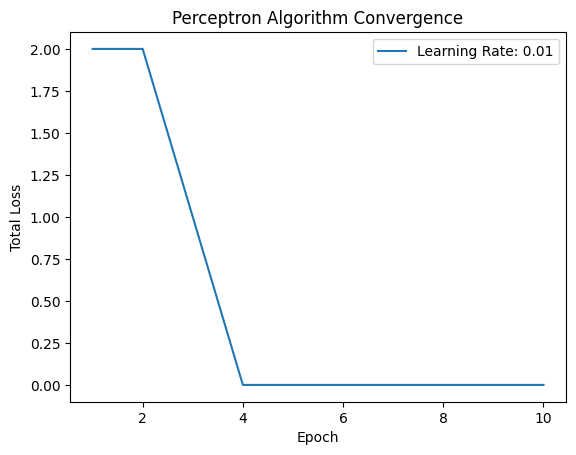

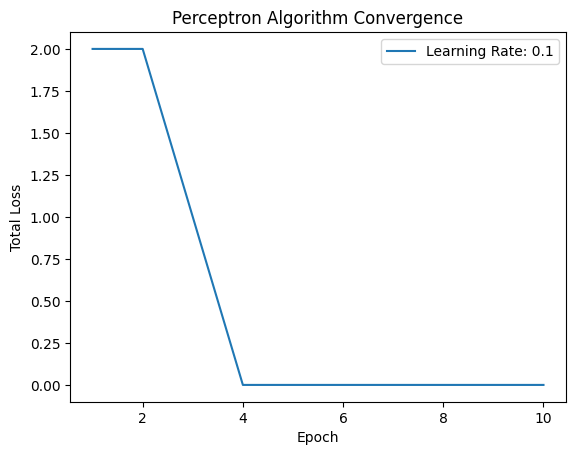

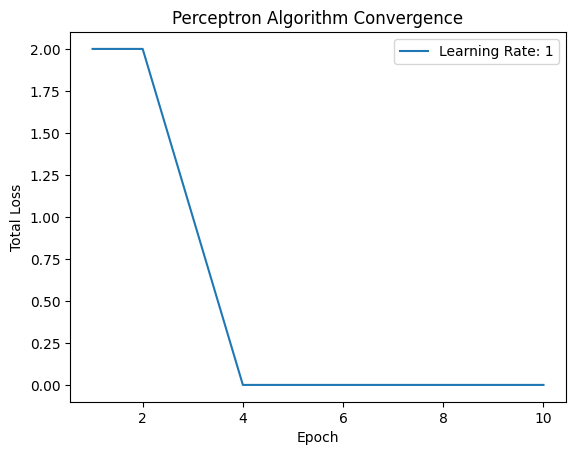

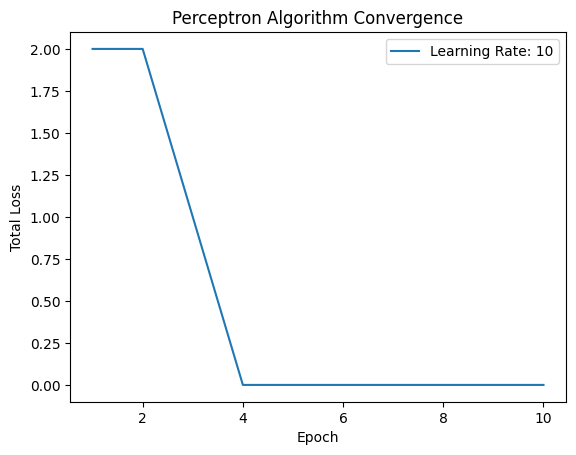

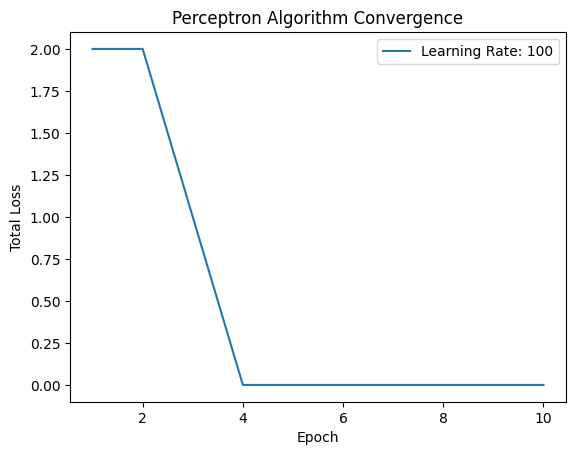

In [17]:
learning_rates = [0.01, 0.1, 1, 10, 100]

perceptron_algo_plot(X, y, learning_rates)


When the learning rate is set to a very large value, the perceptron algorithm may not converge and can exhibit unstable behavior. This occurs because a large learning rate causes the weight updates to be excessively large, leading to overshooting the optimal solution.
In such cases, the algorithm may not converge and might even diverge, resulting in the loss not decreasing or even increasing with each iteration. The weights can oscillate and fail to converge to a stable solution.

Analyzing the effect of learning rate on the performance of a machine learning algorithm, including the perceptron algorithm, is crucial for achieving successful convergence and model optimization.

Understanding the learning rate:

The learning rate determines the step size at each iteration of the optimization process. It controls how much the weights are updated based on the calculated error or loss. A high learning rate allows for larger weight updates, while a low learning rate results in smaller updates.

Effects of increasing the learning rate:

When the learning rate is increased, it can lead to faster convergence since larger weight updates are made at each iteration. This can be beneficial when dealing with a large dataset or when time is a constraint. However, increasing the learning rate too much can lead to overshooting the optimal solution, causing the algorithm to diverge or exhibit unstable behavior.

Effects of decreasing the learning rate:

Decreasing the learning rate can help in achieving a more accurate and precise convergence. With a smaller learning rate, the weight updates are smaller, allowing the algorithm to make smaller adjustments towards the optimal solution. This can be useful when dealing with noisy or complex datasets. However, a very small learning rate may result in slow convergence or getting stuck in suboptimal solutions.

Finding an optimal learning rate:

The choice of an appropriate learning rate depends on the specific problem and dataset. It is typically determined through experimentation and tuning. Techniques such as learning rate schedules, where the learning rate is decreased over time, can be employed to balance the advantages of faster convergence at the beginning with the need for precision in later iterations.

In [20]:
import numpy as np

def perceptron_algo(X, Y, eta=1, epochs=10):
    w = np.zeros(X.shape[1])
    errors = []

    for _ in range(epochs):
        total_error = 0
        for x, y in zip(X, Y):
            activation = np.dot(x, w)
            prediction = np.where(activation >= 0, 1, 0)
            error = y - prediction
            total_error += np.abs(error)
            w += eta * error * x
        errors.append(total_error)

    return w, errors

# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])

# Run perceptron algorithm
w, errors = perceptron_algo(X, y)

# Observations
print("Weight vector:", w)
print("Total Loss in each epoch:", errors)



Weight vector: [-1. -1.]
Total Loss in each epoch: [2, 4, 4, 4, 4, 4, 4, 4, 4, 4]


Observations:

The perceptron algorithm will not converge and will not find a solution to perfectly separate the classes in the XOR problem. This is because XOR is a nonlinearly separable problem, and the perceptron algorithm is limited to finding linear decision boundaries.

The algorithm will iterate through the dataset, adjusting the weights in an attempt to classify the points correctly. However, it will not be able to achieve a perfect separation of the classes.

The total loss or error will not reach zero, indicating that the perceptron algorithm fails to find a linear decision boundary that can separate the classes in the XOR problem.

The number of misclassified points may decrease with each iteration, but the algorithm will not achieve a satisfactory solution.

To address the limitations of the perceptron algorithm and improve its performance, one can explore the following approaches:

1)Feature Engineering: By transforming or creating new features from the existing ones, you can potentially improve the separability of the classes. Nonlinear transformations or adding interaction terms might help capture complex relationships that a linear classifier like the perceptron cannot handle.

2)Nonlinear Classifiers: Consider using more advanced classifiers that can handle nonlinear relationships, such as support vector machines (SVMs), decision trees, random forests, or neural networks. These models can capture complex decision boundaries and are better suited for datasets that are not linearly separable.

3)Regularization: Adding regularization techniques, such as L1 or L2 regularization, to the perceptron algorithm can help prevent overfitting and improve generalization to unseen data. Regularization encourages simpler models by adding a penalty term to the objective function, leading to better performance on validation or testing data.

4)Cross-validation: Instead of relying solely on training accuracy, use cross-validation techniques to estimate the performance of the model on unseen data. This helps in evaluating the model's generalization ability and can guide you in choosing the best-performing model.

5)Perceptron vs SVM:
Perceptron and Support Vector Machines (SVMs) are both linear classifiers, but they have some differences in their approach:

Perceptron is a simple algorithm that directly updates the weights based on misclassified points. It aims to find a decision boundary that separates the classes. It may not always find the optimal solution and can struggle with datasets that are not linearly separable.

SVMs, on the other hand, aim to find the maximum-margin hyperplane that separates the classes. They consider not only the misclassified points but also the points closest to the decision boundary (support vectors). SVMs can handle both linearly separable and non-linearly separable datasets by using kernel functions to map the data to higher-dimensional feature spaces.

While both perceptron and SVMs are linear classifiers, SVMs generally provide better performance and can handle more complex datasets due to their ability to find optimal hyperplanes and handle non-linear transformations using kernel functions. However, SVMs can be computationally more expensive and require tuning of parameters such as the choice of kernel and regularization.

The basic perceptron algorithm is originally designed for binary classification tasks, where there are only two classes. However, there are extensions of the perceptron algorithm that can be used for multi-class classification. Two common approaches for extending the perceptron algorithm to handle multi-class problems are the One-vs-All (OvA) and One-vs-One (OvO) strategies.

One-vs-All (OvA) Strategy:
In the OvA strategy, you train a separate perceptron classifier for each class, treating it as the positive class and the rest of the classes as the negative class. During prediction, you apply all the classifiers to the input data, and the class with the highest output is chosen as the predicted class. This approach requires training N perceptrons for N classes, where N is the number of classes.

One-vs-One (OvO) Strategy:
In the OvO strategy, you train a binary classifier for every pair of classes. For N classes, this results in N*(N-1)/2 classifiers. During prediction, each classifier makes a prediction, and the class that receives the most votes is selected as the final prediction. This approach requires training more classifiers compared to the OvA strategy.

Observations:

The OvA strategy is generally more computationally efficient compared to the OvO strategy because it requires training fewer classifiers. However, it may suffer from imbalanced class distributions since each classifier is trained on a subset of the data.

The OvO strategy can handle imbalanced class distributions better than the OvA strategy since each classifier is trained on a balanced subset of classes. However, it requires training a larger number of classifiers, which can increase computational complexity.

Both OvA and OvO strategies can work well for multi-class classification tasks, but their performance depends on the specific dataset and the choice of hyperparameters.

Advanced algorithms such as Support Vector Machines (SVMs) and neural networks (e.g., multilayer perceptron) can also handle multi-class classification directly and often provide better performance than the basic perceptron algorithm.

When dealing with multi-class classification problems, it is recommended to consider these strategies or explore more advanced algorithms tailored for multi-class scenarios, depending on the specific requirements and characteristics of the dataset.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

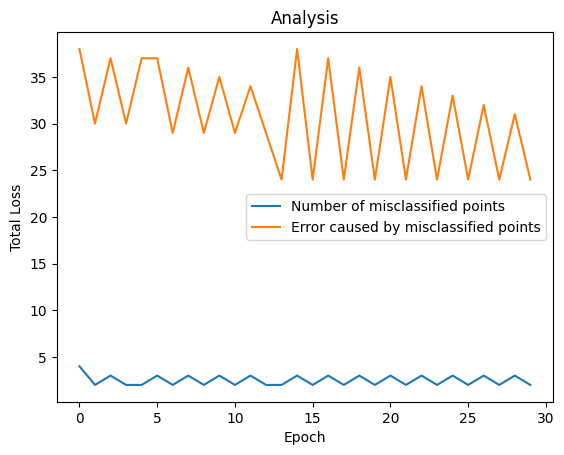

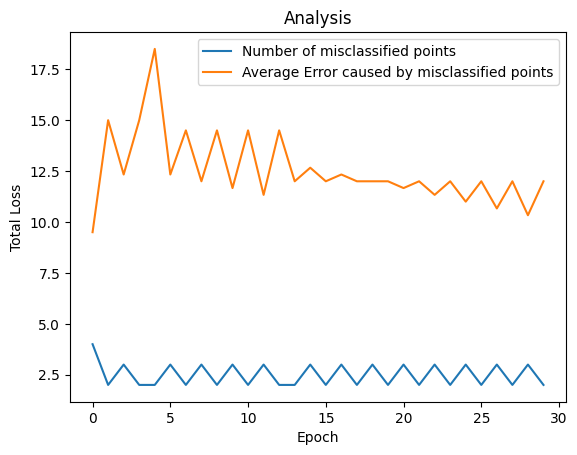

[-2.  3. 15.]


In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.